# # Classifiers introduction

In the following program we introduce the basic steps of classification of a dataset in a matrix

Import the package for learning and modeling trees

In [1]:
from sklearn import tree 

Define the matrix containing the data (one example per row)
and the vector containing the corresponding target value

In [2]:
X = [[0, 0, 0], [1, 1, 1], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1]]
Y = [1, 0, 0, 0, 1, 1]

Declare the classification model you want to use and then fit the model to the data

In [3]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

Predict the target value (and print it) for the passed data, using the fitted model currently in clf

In [4]:
print(clf.predict([[0, 1, 1]]))

[0]


In [5]:
print(clf.predict([[1, 0, 1],[0, 0, 1]]))

[1 0]


In [6]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 


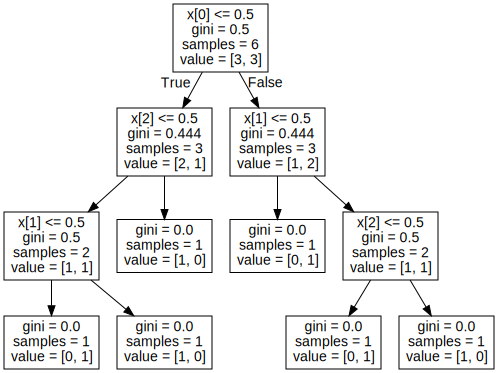

In [7]:
graph = graphviz.Source(dot_data)  
graph

In the following we start using a dataset (from UCI Machine Learning repository)

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()

# Declare the type of prediction model and the working criteria for the model induction algorithm

In [9]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})

# Split the dataset in training and test set

In [10]:
# Generate a random permutation of the indices of examples that will be later used 
# for the training and the test set
import numpy as np
np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-10]
indices_test=indices[-10:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

In [11]:
len(iris.data)
len(iris_X_train)

140

In [12]:
# fit the model to the training data
clf = clf.fit(iris_X_train, iris_y_train)

# Obtain predictions

In [13]:
# apply fitted model "clf" to the test set 
predicted_y_test = clf.predict(iris_X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test)
print("True classes:")
print(iris_y_test) 
print(iris.target_names)

Predictions:
[1 2 1 0 0 0 2 1 2 0]
True classes:
[1 1 1 0 0 0 2 1 2 0]
['setosa' 'versicolor' 'virginica']


Print the index of the test instances and the corresponding predictions

In [14]:
# print the corresponding instances indexes and class names 
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
Predicted: versicolor	 True: versicolor

Instance # 70: 
Predicted: virginica	 True: versicolor

Instance # 87: 
Predicted: versicolor	 True: versicolor

Instance # 36: 
Predicted: setosa	 True: setosa

Instance # 21: 
Predicted: setosa	 True: setosa

Instance # 9: 
Predicted: setosa	 True: setosa

Instance # 103: 
Predicted: virginica	 True: virginica

Instance # 67: 
Predicted: versicolor	 True: versicolor

Instance # 117: 
Predicted: virginica	 True: virginica

Instance # 47: 
Predicted: setosa	 True: setosa



# Look at the specific examples

In [15]:
for i in range(len(iris_y_test)): 
    print("Instance # "+str(indices_test[i])+": ")
    s=""
    for j in range(len(iris.feature_names)):
        s=s+iris.feature_names[j]+"="+str(iris_X_test[i][j])
        if (j<len(iris.feature_names)-1): s=s+", "
    print(s)
    print("Predicted: "+iris.target_names[predicted_y_test[i]]+"\t True: "+iris.target_names[iris_y_test[i]]+"\n")

Instance # 88: 
sepal length (cm)=5.6, sepal width (cm)=3.0, petal length (cm)=4.1, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 70: 
sepal length (cm)=5.9, sepal width (cm)=3.2, petal length (cm)=4.8, petal width (cm)=1.8
Predicted: virginica	 True: versicolor

Instance # 87: 
sepal length (cm)=6.3, sepal width (cm)=2.3, petal length (cm)=4.4, petal width (cm)=1.3
Predicted: versicolor	 True: versicolor

Instance # 36: 
sepal length (cm)=5.5, sepal width (cm)=3.5, petal length (cm)=1.3, petal width (cm)=0.2
Predicted: setosa	 True: setosa

Instance # 21: 
sepal length (cm)=5.1, sepal width (cm)=3.7, petal length (cm)=1.5, petal width (cm)=0.4
Predicted: setosa	 True: setosa

Instance # 9: 
sepal length (cm)=4.9, sepal width (cm)=3.1, petal length (cm)=1.5, petal width (cm)=0.1
Predicted: setosa	 True: setosa

Instance # 103: 
sepal length (cm)=6.3, sepal width (cm)=2.9, petal length (cm)=5.6, petal width (cm)=1.8
Predicted: virginica	 True: virginica

Insta

# Obtain model performance results

In [16]:
# print some metrics results
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
acc_score = accuracy_score(iris_y_test, predicted_y_test)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test, average='macro')
print("F1 score: "+str(f1))

Accuracy score: 0.9
F1 score: 0.8857142857142858


# Use Cross Validation

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)

[0.96666667 1.         0.86666667 0.86666667 1.        ]


In [18]:
# computes F1- score
f1_scores = cross_val_score(clf, iris.data, iris.target, cv=5, scoring='f1_macro')
print(f1_scores)

[0.96658312 1.         0.86111111 0.86666667 1.        ]


# Show the resulting tree 

## 1. Print the picture in a PDF file

In [19]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("my_iris_predictions")

'my_iris_predictions.pdf'

## 2. Generate a picture here

In [20]:
print(list(iris.feature_names))
print(list(iris.target_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa', 'versicolor', 'virginica']


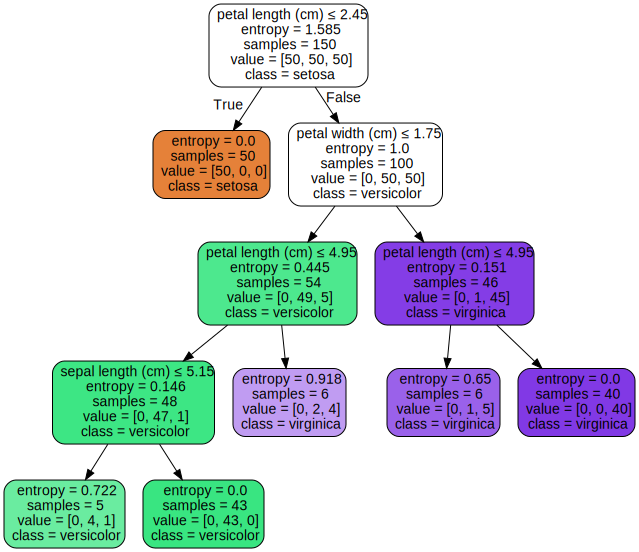

In [21]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

# Your work: what you have to do
Modify the given Jupyter notebook on decision trees on Iris data and perform the following tasks:

1. get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica e versicolor which are more difficult to discriminate). Learn the tree in these conditions.
1.b) modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor and vice versa) and learn the tree in these conditions. You should obtain similar results as for step 1.
2. learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.
3. build the confusion matrix of the created tree models on the test set and show them. 
4. build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created: for each model you have to build three curves, one for each class, considered in turn as the positive class.

In [22]:
def shuffle_data(X, y):
    l = list(zip(X, y))
    np.random.shuffle(l)
    return list(zip(*l))

## 1.a Artificial inflation
The classes virginica and versicolor have been oversampled by a factor of 10. Each example belonging to those classses has been repeated 10 times in order to achieve the artificial inflation.


### Inflating the data

In [23]:
iris = load_iris()

inflated_data = iris.data 
inflated_target = iris.target
training_test_size = 300

inf_indexes = []
for i in range(len(iris.target)):
    if (iris.target[i] != 0):
        inf_indexes += [i]

for j in inf_indexes:
    for i in range(9):
        inflated_target = np.append(inflated_target, [iris.target[j]], axis=0)
        inflated_data = np.append(inflated_data, [iris.data[j]], axis=0)

np.random.seed(0)
indices = np.random.permutation(len(inflated_data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-training_test_size]
indices_test=indices[-training_test_size:]

iris_X_train_inflated = inflated_data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train_inflated = inflated_target[indices_training]
iris_X_test_inflated  = inflated_data[indices_test] # keep the last 10 elements for test set
iris_y_test_inflated  = inflated_target[indices_test]

### Fitting and prediction

In [46]:
clf_inf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf_inf = clf_inf.fit(iris_X_train_inflated, iris_y_train_inflated)

predicted_y_test_inflated = clf_inf.predict(iris_X_test_inflated)

# print some metrics results
acc_score = accuracy_score(iris_y_test_inflated, predicted_y_test_inflated)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test_inflated, predicted_y_test_inflated, average='macro')
print("F1 score: "+str(f1))
cross_scores_inflated = cross_val_score(clf_inf, iris_X_train_inflated, iris_y_train_inflated, cv=5) # score will be the accuracy
print("Cross-validation accuracy: "+str(cross_scores_inflated))

Accuracy score: 1.0
F1 score: 1.0
Cross-validation accuracy: [0.96666667 1.         1.         1.         1.        ]


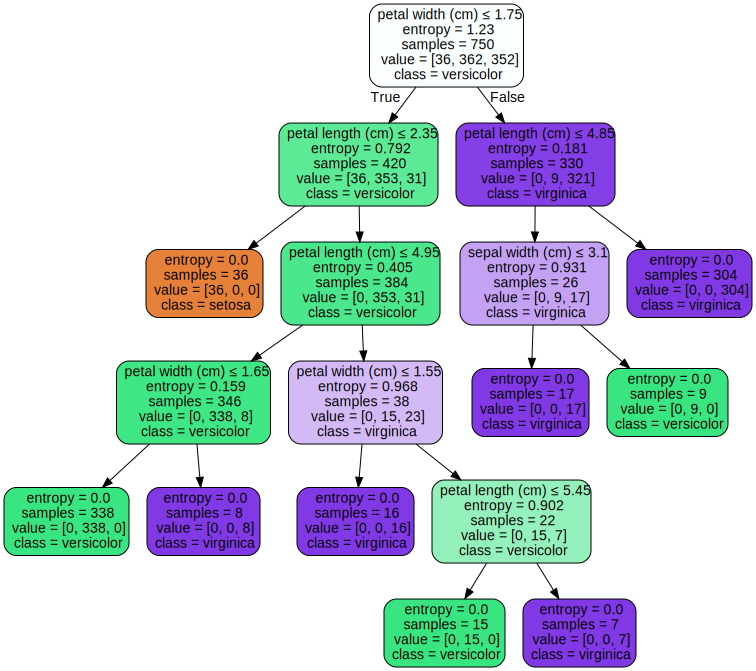

In [25]:
dot_data = tree.export_graphviz(clf_inf, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## 1.b Unbalanced weights
Weights for misclassification of the classes virginica and versicolor have been inhcreased by a factor of 10 to achieve similar results to the oversampling.

In [26]:
import numpy as np

iris = load_iris()
test_size = 10

np.random.seed(0)
indices = np.random.permutation(len(iris.data))

# We now decide to keep the last 10 indices for test set, the remaining for the training set
indices_training=indices[:-test_size]
indices_test=indices[-test_size:]

iris_X_train = iris.data[indices_training] # keep for training all the matrix elements with the exception of the last 10 
iris_y_train = iris.target[indices_training]
iris_X_test  = iris.data[indices_test] # keep the last 10 elements for test set
iris_y_test  = iris.target[indices_test]

clf_unb = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=10, class_weight={0:1,1:10,2:10})
clf_unb = clf_unb.fit(iris_X_train, iris_y_train)

predicted_y_test_unbalanced = clf_unb.predict(iris_X_test)

### Fitting and prediction

In [27]:
# print some metrics results
acc_score = accuracy_score(iris_y_test, predicted_y_test_unbalanced)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(iris_y_test, predicted_y_test_unbalanced, average='macro')
print("F1 score: "+str(f1))
cross_scores_unbalanced = cross_val_score(clf_unb, iris.data, iris.target, cv=5) # score will be the accuracy
print("Cross-validation accuracy: "+str(cross_scores_unbalanced))


Accuracy score: 0.9
F1 score: 0.8857142857142858
Cross-validation accuracy: [0.93333333 0.96666667 0.9        0.86666667 1.        ]


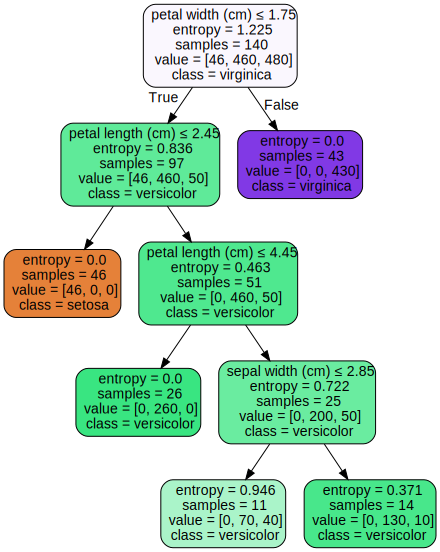

In [28]:
dot_data = tree.export_graphviz(clf_unb, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## 2 Try to avoid overfitting
Learning trees but trying to avoid overfitting:
- Minimum number of samples per leaf: comparing cross-validation accuracy scores emerges that the the model which uses unbalanced weights is not affected by this hyperparameter, while the optimal setting for the one which uses artificial inflation seems to be 1, although 11 gives great results and I'm prone to think it's a safer choice to avoid overfitting.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [47]:
param_grid = [{
    'criterion': ["entropy","gini"], 
    #'min_samples_leaf': range(1,30),
    'max_depth': range(1,10),
    'max_leaf_nodes': range(3,15),
    'min_impurity_decrease': np.arange(0,1,0.1),
    'max_features': ["sqrt", "log2", None]
    }]

#### Grid search for the artificial inflated model

In [48]:
search_inf = GridSearchCV(clf_inf, param_grid, cv=5)
search_inf.fit(iris_X_train_inflated, iris_y_train_inflated)
search_inf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 9,
 'min_impurity_decrease': 0.0}

In [32]:
"""means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" 
    % (mean, std * 2, params))
print()"""

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = iris_y_test_inflated, search_inf.predict(iris_X_test_inflated)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00       138
           2       1.00      1.00      1.00       148

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300




#### Grid search for the unbalanced weighted model

In [33]:
search_unb = GridSearchCV(clf_unb, param_grid, cv=5)
search_unb.fit(iris_X_train, iris_y_train)
search_unb.best_params_

C:\Users\OliverioM\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\OliverioM\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\OliverioM\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\OliverioM\AppData\Roaming\Python\Python311\site-packages\sklearn\tree\_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3.

{'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': 3,
 'min_impurity_decrease': 0.0}

In [34]:
"""means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" 
    % (mean, std * 2, params))
print()"""

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = iris_y_test, search_unb.predict(iris_X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.75      0.86         4
           2       0.67      1.00      0.80         2

    accuracy                           0.90        10
   macro avg       0.89      0.92      0.89        10
weighted avg       0.93      0.90      0.90        10




## 3 Confusion matrix

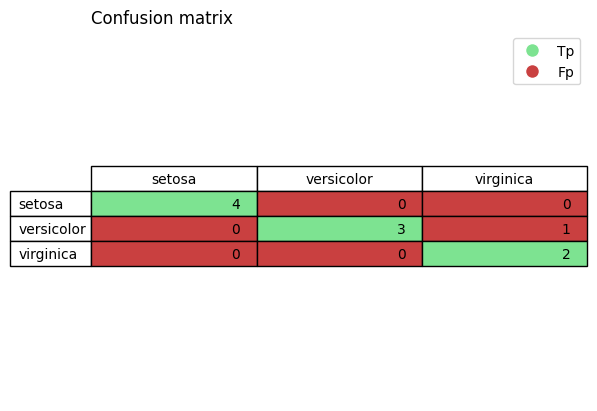

In [35]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

g = "#7de391"
r = "#c94040"

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Tp',
                          markerfacecolor=g, markersize=10),
                   Line2D([0],[0],marker='o', color='w', label='Fp',
                          markerfacecolor=r, markersize=10)]

cm = confusion_matrix(iris_y_test, predicted_y_test_unbalanced, labels=[0,1,2])

fig = plt.figure()
ax = fig.add_subplot(111)
colors = [[g, r, r],[r, g, r],[r, r, g]]
the_table = ax.table(rowLabels=iris.target_names, colLabels=iris.target_names, cellText=cm, cellColours=colors, loc="center")
ax.legend(handles=legend_elements)
plt.axis('tight')
plt.axis('off')
plt.title("Confusion matrix", loc="left")
the_table.scale(1,1.5)

plt.box(on=None)
plt.show()

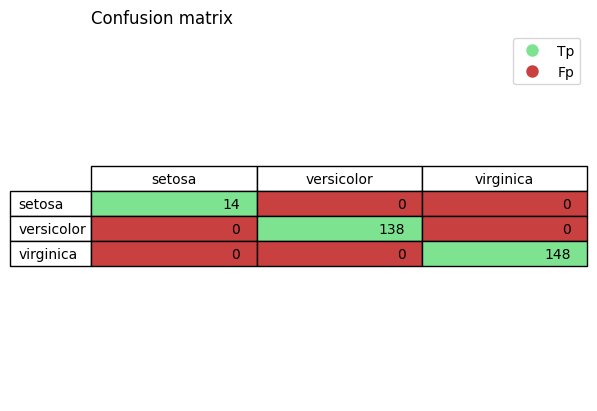

In [36]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

g = "#7de391"
r = "#c94040"

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Tp',
                          markerfacecolor=g, markersize=10),
                   Line2D([0],[0],marker='o', color='w', label='Fp',
                          markerfacecolor=r, markersize=10)]

cm = confusion_matrix(iris_y_test_inflated, predicted_y_test_inflated, labels=[0,1,2])

fig = plt.figure()
ax = fig.add_subplot(111)
colors = [[g, r, r],[r, g, r],[r, r, g]]
the_table = ax.table(rowLabels=iris.target_names, colLabels=iris.target_names, cellText=cm, cellColours=colors, loc="center")
ax.legend(handles=legend_elements)
plt.axis('tight')
plt.axis('off')
plt.title("Confusion matrix", loc="left")
the_table.scale(1,1.5)

plt.box(on=None)
plt.show()

## 4 ROC

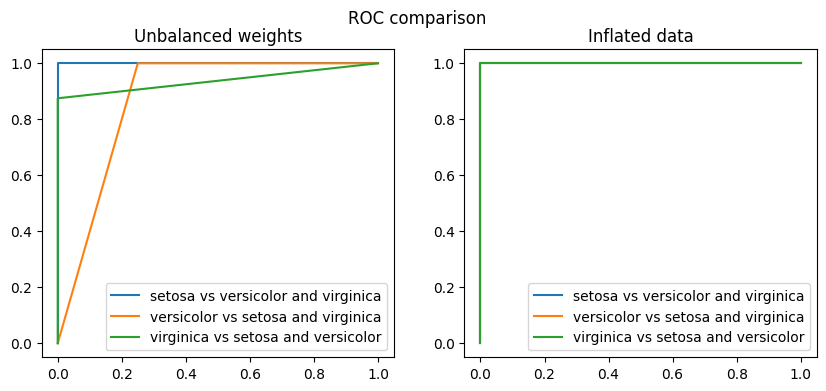

In [37]:
from sklearn.metrics import roc_curve

fig, (ax1, ax2) = plt.subplots(1,2)
legend_elements = [ iris.target_names[0] + " vs " + iris.target_names[1] + " and " + iris.target_names[2],
                    iris.target_names[1] + " vs " + iris.target_names[0] + " and " + iris.target_names[2],
                    iris.target_names[2] + " vs " + iris.target_names[0] + " and " + iris.target_names[1]]


for t in [0,1,2]:
    y_binary = [0 if y == t else 1 for y in iris_y_test]
    y_pred_binary = [0 if y == t else 1 for y in predicted_y_test_unbalanced]

    fpr, tpr, thresholds = roc_curve(y_binary, y_pred_binary, drop_intermediate=False)
    ax1.plot(fpr, tpr)

ax1.legend(legend_elements)
ax1.title.set_text("Unbalanced weights")

for t in [0,1,2]:
    y_binary = [0 if y == t else 1 for y in iris_y_test_inflated]
    y_pred_binary = [0 if y == t else 1 for y in predicted_y_test_inflated]

    fpr, tpr, thresholds = roc_curve(y_binary, y_pred_binary, drop_intermediate=False)
    ax2.plot(fpr, tpr)

ax2.legend(legend_elements)
ax2.title.set_text("Inflated data")

fig.set_figwidth(10)
fig.set_figheight(4)
fig.suptitle("ROC comparison", )

plt.show()

## More experiments

#### Accuracy wrt different size of the leafs in a model with unbalanced weights

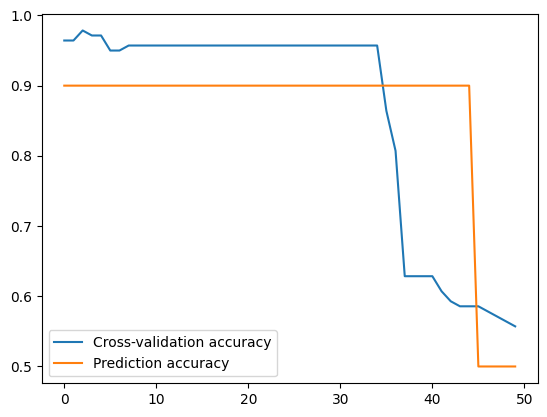

In [38]:
from matplotlib import pyplot as plt
import numpy as np

res_cross = np.zeros(len(iris_X_train))
res_pred = np.zeros(len(iris_X_train))

for leafs in range(len(iris_X_train)):
    clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=leafs+1, class_weight={0:1,1:10,2:10})
    clf.fit(iris_X_train, iris_y_train)
    preds = clf.predict(iris_X_test)
    res_pred[leafs] = accuracy_score(iris_y_test, preds)
    res_cross[leafs] = cross_val_score(clf, iris_X_train, iris_y_train).mean()

fif, ax = plt.subplots()
ax.plot(range(len(iris_X_train))[:50], res_cross[:50])
ax.plot(range(len(iris_X_train))[:50], res_pred[:50])
ax.legend(["Cross-validation accuracy", "Prediction accuracy"])

In [39]:
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=10, class_weight={0:1,1:10,2:10})
clf.fit(iris_X_train, iris_y_train)
preds = clf.predict(iris_X_test)
a = accuracy_score(iris_y_test, preds)
c = cross_val_score(clf, iris_X_train, iris_y_train)
print("Acc: " + str(a) + " Cross: " + str(c))

Acc: 0.9 Cross: [0.96428571 0.89285714 1.         0.96428571 0.96428571]


#### Accuracy wrt different size of the leafs in a model with inflated classes

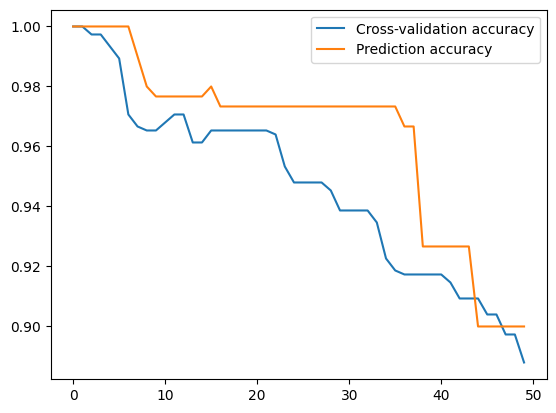

In [40]:
from matplotlib import pyplot as plt

res_cross = np.zeros(len(iris_X_train))
res_pred = np.zeros(len(iris_X_train))

for leafs in range(len(iris_X_train)):
    clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=leafs+1, class_weight={0:1,1:1,2:1})
    clf.fit(iris_X_train_inflated, iris_y_train_inflated)
    preds = clf.predict(iris_X_test_inflated)
    res_pred[leafs] = accuracy_score(iris_y_test_inflated, preds)
    res_cross[leafs] = cross_val_score(clf, iris_X_train_inflated, iris_y_train_inflated).mean()

fif, ax = plt.subplots()
ax.plot(range(len(iris_X_train))[:50], res_cross[:50])
ax.plot(range(len(iris_X_train))[:50], res_pred[:50])
ax.legend(["Cross-validation accuracy", "Prediction accuracy"])

#### Cross-validation accuracy score for different number of folds

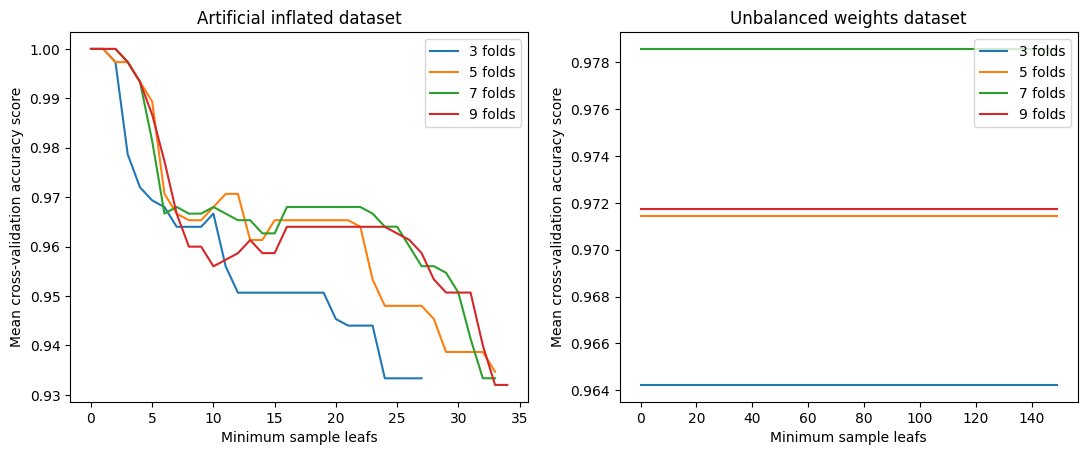

In [41]:
from matplotlib import pyplot as plt

k_folds = [3,5,7,9]
fig, (ax1, ax2) = plt.subplots(1,2)
min_accuracy = 0.93
plt.title("Cross-validation accuracy score for different number of folds")
fig.set_figwidth(13)

for k in k_folds :
    max_cross = 0
    best_min_leafs = 1
    scores = np.zeros(len(inflated_data))

    for min_leafs in range(len(inflated_data)):
        clf_inf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=min_leafs+1,class_weight={0:1,1:1,2:1})
        cross_scores_inflated = cross_val_score(clf_inf, iris_X_train_inflated, iris_y_train_inflated, cv=k) # score will be the accuracy
        scores[min_leafs] = cross_scores_inflated.mean()

        if(max_cross <= scores[min_leafs]):
            max_cross = scores[min_leafs]
            best_min_leafs = min_leafs+1

    #print("Best mean cross score: " + str(max_cross) + " with " + str(best_min_leafs) + " minimum leafs and " + str(k) + " folds")

    high_scores = scores[scores>=min_accuracy]
    x_high_scores = np.arange(len(inflated_data))[scores>=min_accuracy]
    ax1.plot(x_high_scores[::-1], high_scores[::-1])

ax1.legend([str(k) + " folds" for k in k_folds])
ax1.set_ylabel("Mean cross-validation accuracy score")
ax1.set_xlabel("Minimum sample leafs")
ax1.title.set_text("Artificial inflated dataset")

################################################################################################################################
for k in k_folds :
    max_cross = 0
    best_min_leafs = 1
    scores = np.zeros(len(iris.data))

    for min_leafs in range(len(iris.data)):
        clf_un = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:10,2:10})
        cross_scores_inflated = cross_val_score(clf_un, iris_X_train, iris_y_train, cv=k) # score will be the accuracy
        scores[min_leafs] = cross_scores_inflated.mean()

        if(max_cross <= scores[min_leafs]):
            max_cross = scores[min_leafs]
            best_min_leafs = min_leafs+1

    #print("Best mean cross score: " + str(max_cross) + " with " + str(best_min_leafs) + " minimum leafs and " + str(k) + " folds")

    high_scores = scores[scores>min_accuracy]
    x_high_scores = np.arange(len(iris.data))[scores>=min_accuracy]
    ax2.plot(x_high_scores[::-1], high_scores[::-1])

ax2.legend([str(k) + " folds" for k in k_folds])
ax2.set_ylabel("Mean cross-validation accuracy score")
ax2.set_xlabel("Minimum sample leafs")
ax2.title.set_text("Unbalanced weights dataset")